In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("survey_results_public.csv")

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [4]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]
df = df.rename({"ConvertedComp": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,United Kingdom,Primary/elementary school,NaN,"Not employed, and not looking for work",NaN
1,Bosnia and Herzegovina,"Secondary school (e.g. American high school, G...",NaN,"Not employed, but looking for work",NaN
2,Thailand,"Bachelor’s degree (BA, BS, B.Eng., etc.)",1,Employed full-time,8820.0
3,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Less than 1 year,Employed full-time,61000.0
4,Ukraine,"Bachelor’s degree (BA, BS, B.Eng., etc.)",9,Employed full-time,NaN


In [5]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
2,Thailand,"Bachelor’s degree (BA, BS, B.Eng., etc.)",1,Employed full-time,8820.0
3,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Less than 1 year,Employed full-time,61000.0
5,Canada,"Bachelor’s degree (BA, BS, B.Eng., etc.)",3,Employed full-time,366420.0
8,New Zealand,Some college/university study without earning ...,4,Employed full-time,95179.0
9,India,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",10,Employed full-time,13293.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55823 entries, 2 to 88330
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       55823 non-null  object 
 1   EdLevel       54992 non-null  object 
 2   YearsCodePro  55657 non-null  object 
 3   Employment    55685 non-null  object 
 4   Salary        55823 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.6+ MB


In [7]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [8]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48248 entries, 2 to 88330
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48248 non-null  object 
 1   EdLevel       48248 non-null  object 
 2   YearsCodePro  48248 non-null  object 
 3   Salary        48248 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.8+ MB


In [9]:
df['Country'].value_counts()

Country
United States        13878
India                 3635
United Kingdom        3555
Germany               3075
Canada                1943
                     ...  
Togo                     1
Timor-Leste              1
Brunei Darussalam        1
Liechtenstein            1
Andorra                  1
Name: count, Length: 156, dtype: int64

In [10]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [11]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
United States         13878
Other                 10698
India                  3635
United Kingdom         3555
Germany                3075
Canada                 1943
France                 1435
Brazil                 1178
Australia              1079
Spain                  1058
Poland                  983
Russian Federation      946
Netherlands             940
Sweden                  804
Italy                   795
Israel                  496
Switzerland             478
Turkey                  433
Ukraine                 430
Belgium                 409
Name: count, dtype: int64

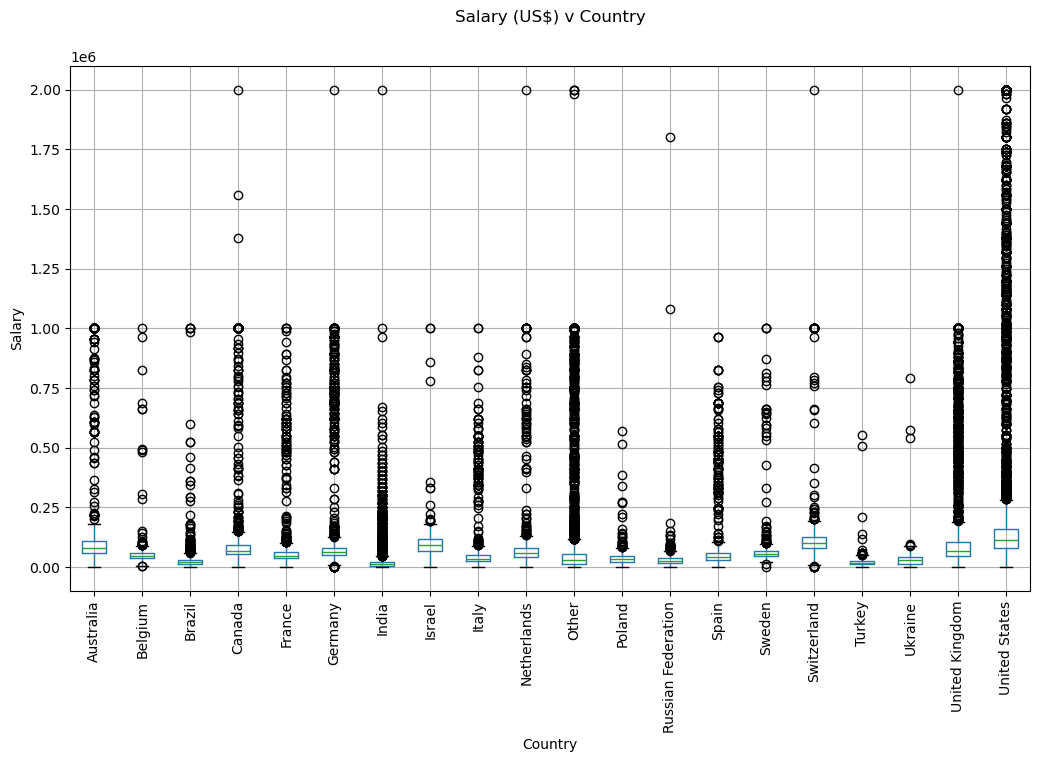

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [13]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

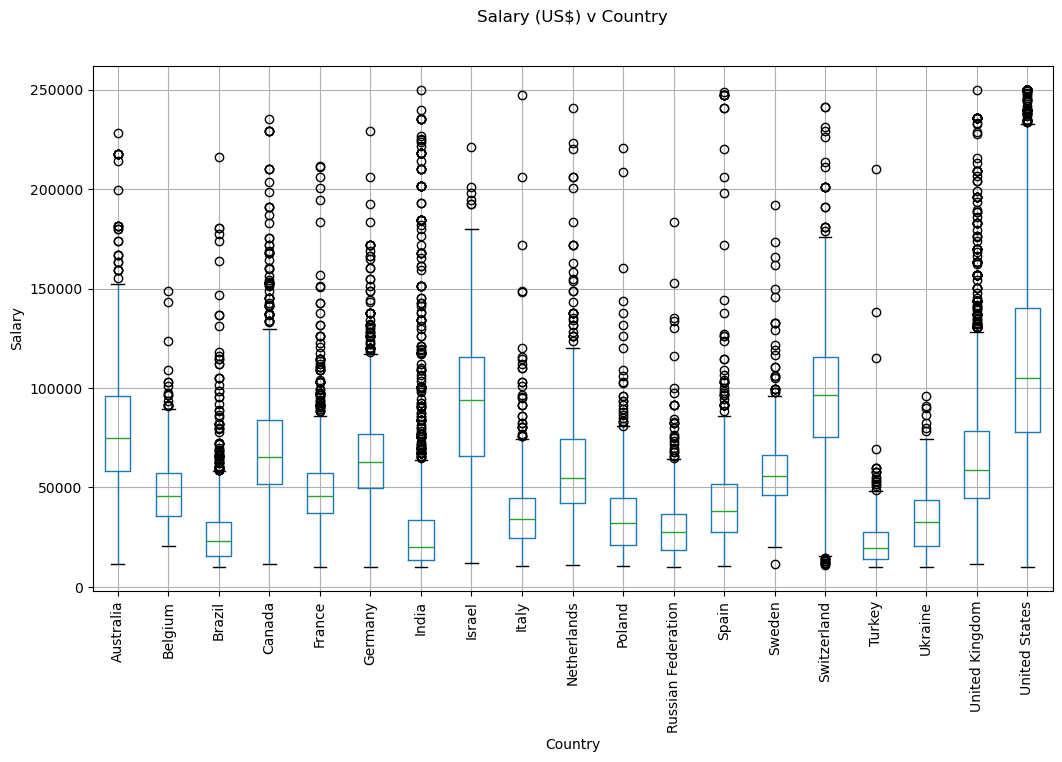

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [15]:
df["YearsCodePro"].unique()

array(['Less than 1 year', '10', '8', '2', '3', '13', '18', '1', '14',
       '23', '19', '35', '20', '9', '25', '7', '5', '27', '6', '48', '4',
       '31', '11', '12', '17', '16', '15', '29', '26', '30', '33', '21',
       '37', '28', '22', '40', '34', '24', '32', '38', '44', '36', '43',
       '41', '42', '39', '45', '47', 'More than 50 years', '50', '49'],
      dtype=object)

In [16]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [17]:
df["EdLevel"].unique()

array(['Bachelor’s degree (BA, BS, B.Eng., etc.)',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
       'Other doctoral degree (Ph.D, Ed.D., etc.)',
       'Some college/university study without earning a degree',
       'Primary/elementary school',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree', 'Professional degree (JD, MD, etc.)',
       'I never completed any formal education'], dtype=object)

In [18]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [19]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Post grad',
       'Less than a Bachelors'], dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()

array([0, 2, 3, 1])

In [21]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([18,  6,  5,  0, 11,  2,  7, 14, 12, 10,  4,  9, 17,  3, 13,  8, 15,
       16,  1])

In [22]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [23]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [24]:
y_pred = linear_reg.predict(X)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [26]:
error

39435.03273441779

In [27]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [28]:
y_pred = dec_tree_reg.predict(X)

In [29]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$30,737.90


In [30]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [31]:
y_pred = random_forest_reg.predict(X)

In [32]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$30,785.10


In [33]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [34]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$31,121.22


In [35]:
X

,Country,EdLevel,YearsCodePro
3,18,0,0.5
9,6,2,10.0
12,18,2,8.0
13,5,3,2.0
16,0,0,2.0
...,...,...,...
88309,5,1,17.0
88312,18,0,11.0
88318,10,0,2.0
88323,18,0,2.0


In [36]:
# country, edlevel, yearscode
X = np.array([["United States", 'Master’s degree', 15 ]])
X

array([['United States', 'Master’s degree', '15']], dtype='<U15')

In [37]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[18.,  2., 15.]])

In [40]:
y_pred = regressor.predict(X)
y_pred

D:\programs\ANACONDA\envs\ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([139056.10465116])

In [41]:
import pickle

In [42]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [43]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [44]:
y_pred = regressor_loaded.predict(X)
y_pred

D:\programs\ANACONDA\envs\ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([139056.10465116])